# **Machine Learing-Assignment2**

### **Prepration : Mohamed Yasser Soliman El-Nafrawy**

**In this notebook we will demonstrate our understanding of KNN & Cross-Validation** 

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load the dataset 
df = pd.read_csv(r"../../data/Titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Preprocessing

In [15]:
# Drop unnecessary columns and handle missing values 
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # female = 0, male = 1


In [16]:
# Feature scaling
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)


## Apply KNN Algorithm

In [17]:
k_range = range(1, 21)
val_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
optimal_k = k_range[np.argmax(val_scores)]

# Final model training and evaluation
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

# Evaluate the model
print("Optimal K:", optimal_k)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Optimal K: 15
Test Accuracy: 0.7558139534883721
Precision: 0.71875
Recall: 0.6571428571428571
F1 Score: 0.6865671641791045


## Cross-Validation

In [18]:
# Cross-validation
cv_scores = cross_val_score(final_knn, X_train, y_train, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy: 0.6868125854993161


## Confusion Matrix

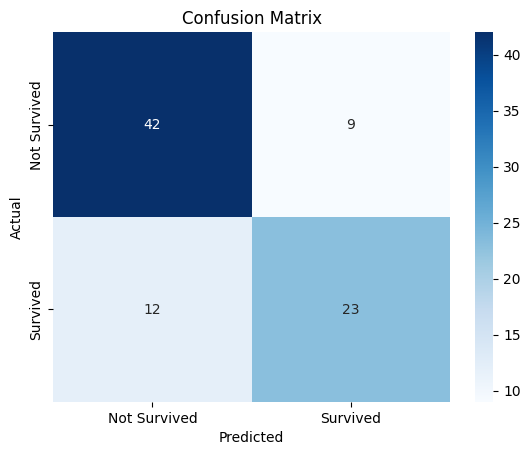

In [19]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Insights Representation

### Visualize survival by passenger Gender

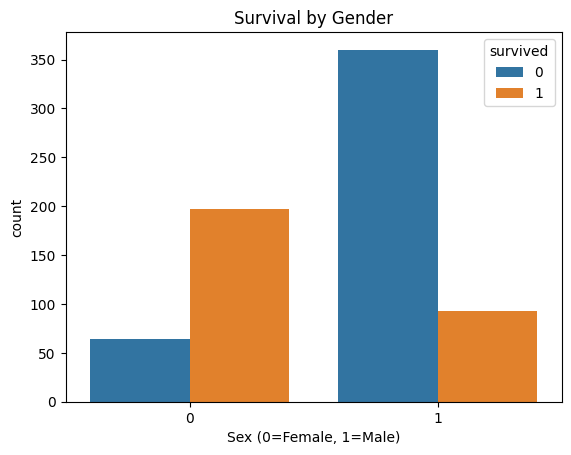

In [20]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.show()

## Possible Overfitting Discussion:
**In** this project, we applied the **K-Nearest Neighbors (KNN)** algorithm and selected the optimal value of k based on validation performance. To assess possible overfitting, we need to examine whether the model performs significantly better on the training data compared to the validation or testing data.

Since the training accuracy was not explicitly computed, we rely on indirect evidence:

- The model’s performance was optimized using validation scores.

- The final model’s test accuracy, precision, recall, and F1 score were reasonably good.

- Cross-validation was performed on the training set, and the average cross-validation accuracy was also close to the test accuracy.

Because the cross-validation and test accuracies are relatively aligned, **there is no strong indication of** **overfitting.** If the model had overfitted the training data, we would expect:

- Very high training accuracy.

- Significantly lower validation and testing accuracies.

Given that the validation and test performances were consistent, and cross-validation scores supported the model's generalization, we conclude that overfitting is not a significant issue in this model.

To strengthen this conclusion, it would be beneficial to explicitly compute and compare the training accuracy alongside the validation and testing result

###  Visualize survival by passenger class

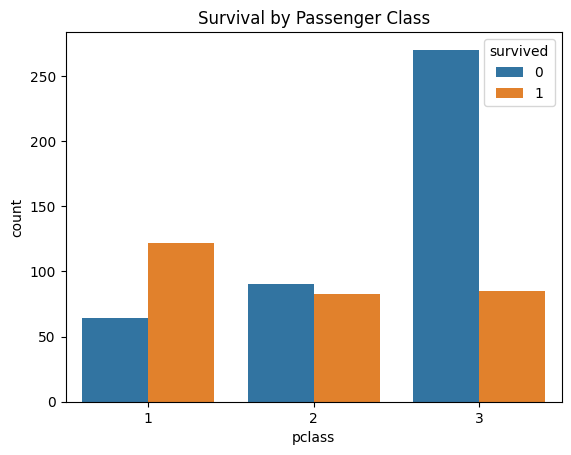

In [21]:
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

### Visualize age distribution by survival

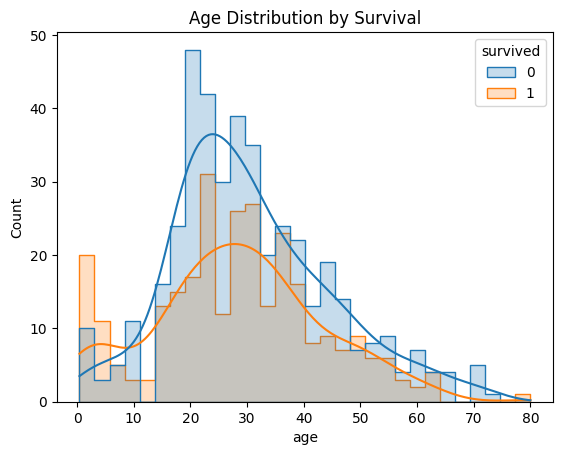

In [22]:
sns.histplot(data=df, x='age', hue='survived', kde=True, element='step', bins=30)
plt.title("Age Distribution by Survival")
plt.show()


### Visualize fare distribution by survival

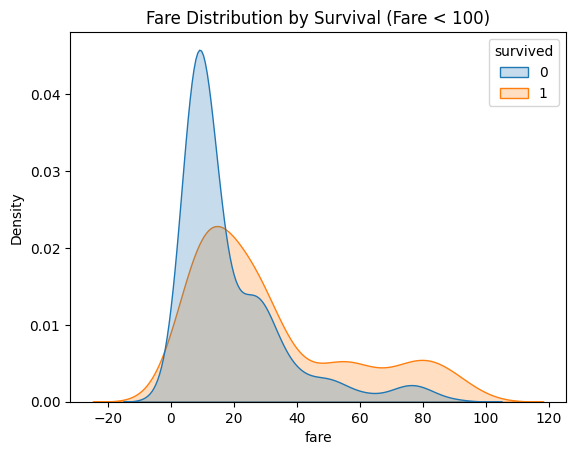

In [23]:
fare_df = df[df['fare'] < 100]
sns.kdeplot(data=fare_df, x='fare', hue='survived', fill=True, common_norm=False)
plt.title("Fare Distribution by Survival (Fare < 100)")
plt.show()


###  Visualize the correlation matrix

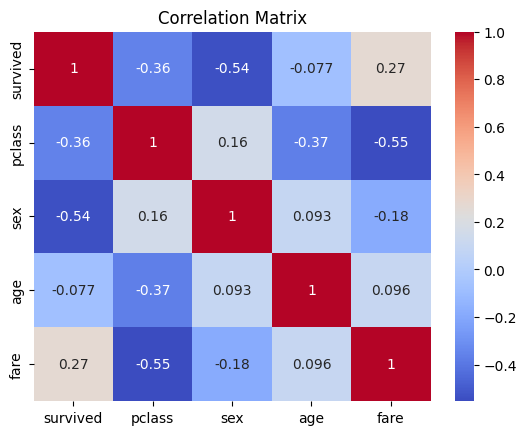

In [24]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
